In [55]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import ttest_ind

import numpy as np


olympic_load = Path("olympic_merged.csv")

# Read School and Student Data File and store into Pandas DataFrames
olympic_merged = pd.read_csv(olympic_load )

olympic_merged.isnull().sum()


Unnamed: 0         0
ID                 0
Name               0
Sex                0
Age             9474
Height         60171
Weight         62875
Team               0
Games              0
Year               0
Season             0
City               0
Sport              0
Medal         231333
region           370
dtype: int64

In [76]:
olympic_merged=olympic_merged.fillna("NA")
olympic_merged=olympic_merged.loc[olympic_merged["Medal"]!="NA",:]
olympic_merged=olympic_merged.loc[olympic_merged["Age"]!="NA",:]

olympic_merged_m=olympic_merged.loc[olympic_merged["Sex"]!="M",:]
olympic_merged_m_list=olympic_merged_m[["Age","ID"]].copy()
olympic_m_age=olympic_merged_m_list.values.tolist()
olympic_m_age

[[27.0, 21.0],
 [22.0, 29.0],
 [23.0, 37.0],
 [21.0, 65.0],
 [22.0, 67.0],
 [21.0, 90.0],
 [23.0, 150.0],
 [23.0, 153.0],
 [20.0, 165.0],
 [21.0, 259.0],
 [19.0, 394.0],
 [20.0, 395.0],
 [17.0, 424.0],
 [25.0, 428.0],
 [24.0, 547.0],
 [23.0, 548.0],
 [28.0, 580.0],
 [26.0, 610.0],
 [16.0, 627.0],
 [30.0, 680.0],
 [27.0, 690.0],
 [31.0, 690.0],
 [29.0, 832.0],
 [33.0, 832.0],
 [26.0, 837.0],
 [24.0, 840.0],
 [23.0, 846.0],
 [27.0, 846.0],
 [31.0, 846.0],
 [25.0, 925.0],
 [16.0, 968.0],
 [39.0, 975.0],
 [19.0, 980.0],
 [19.0, 980.0],
 [23.0, 980.0],
 [23.0, 980.0],
 [25.0, 1020.0],
 [29.0, 1020.0],
 [21.0, 1023.0],
 [20.0, 1071.0],
 [20.0, 1088.0],
 [22.0, 1094.0],
 [16.0, 1109.0],
 [16.0, 1109.0],
 [23.0, 1131.0],
 [29.0, 1169.0],
 [33.0, 1169.0],
 [18.0, 1181.0],
 [23.0, 1181.0],
 [26.0, 1181.0],
 [27.0, 1191.0],
 [19.0, 1211.0],
 [23.0, 1221.0],
 [27.0, 1254.0],
 [23.0, 1262.0],
 [21.0, 1301.0],
 [32.0, 1313.0],
 [27.0, 1340.0],
 [22.0, 1380.0],
 [22.0, 1380.0],
 [22.0, 1380.0],
 [23.

In [77]:
olympic_merged_f=olympic_merged.loc[olympic_merged["Sex"]!="F",:]
olympic_merged_f_list=olympic_merged_f[["Age","ID"]].copy()
olympic_f_age=olympic_merged_f_list.values.tolist()


In [79]:
ttest_ind(olympic_m_age, olympic_f_age, equal_var=False)

Ttest_indResult(statistic=array([-32.26954353,   6.06901576]), pvalue=array([1.28265475e-223, 1.30945834e-009]))

In [45]:
grouped_age=olympic_merged.groupby("Age")
age=grouped_age.count()
age

,Unnamed: 0,ID,Name,Sex,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
Age,,,,,,,,,,,,,,
10.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
12.0,6,6,6,6,6,6,6,6,6,6,6,6,6,6
13.0,16,16,16,16,16,16,16,16,16,16,16,16,16,16
14.0,75,75,75,75,75,75,75,75,75,75,75,75,75,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
69.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
71.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2


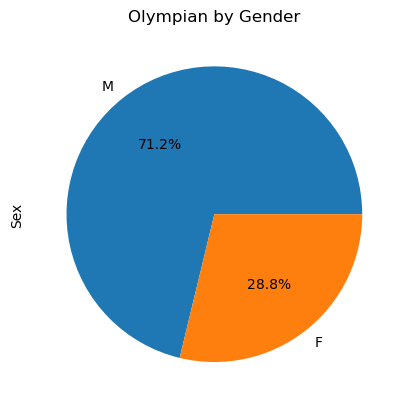

In [9]:
gender_chart=olympic_merged["Sex"].value_counts()
plt.title("Olympian by Gender")
gender_chart.plot.pie(autopct= "%1.1f%%")
plt.show()

In [17]:
age_bin=[9,20,30,40,50,60,70,80]
labels = ["under 20", "20s", "30s", "40s","50s","60s","70 and over"]
olympic_merged_ap=olympic_merged.copy()
olympic_merged_ap["Age by Decade"]=pd.cut(olympic_merged_ap["Age"],age_bin,labels=labels,include_lowest=True)
olympic_merged_f=olympic_merged_ap.loc[olympic_merged_ap["Sex"]!="F",:]
olympic_merged_m=olympic_merged_ap.loc[olympic_merged_ap["Sex"]!="M",:]

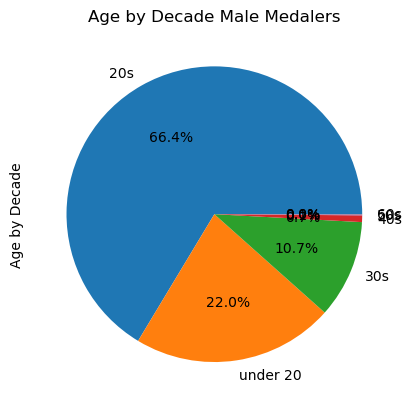

In [19]:
age_m_chart=olympic_merged_m["Age by Decade"].value_counts()
plt.title("Age by Decade Male Medalers")
age_m_chart.plot.pie(autopct= "%1.1f%%")
plt.show()

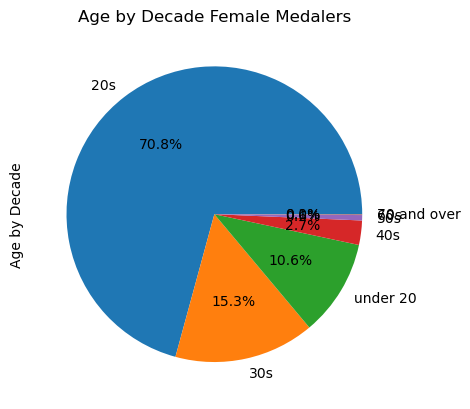

In [25]:
age_f_chart=olympic_merged_f["Age by Decade"].value_counts()
plt.title("Age by Decade Female Medalers")
age_f_chart.plot.pie(autopct= "%1.1f%%")
plt.show()

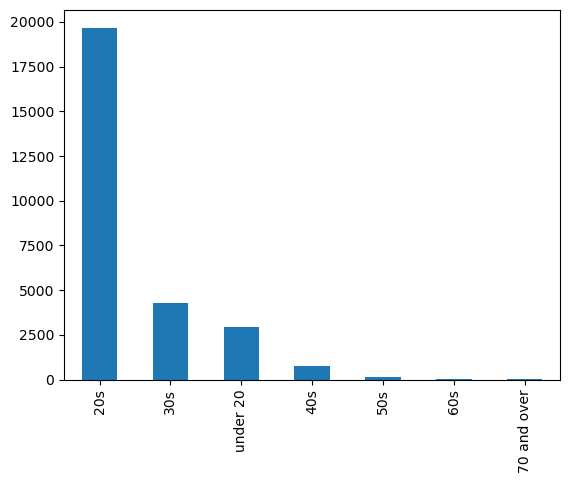

In [31]:
age_f_chart.plot.bar(x="Medal",y="Age")
plt.show()